In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from epiweeks import Year

In [2]:
sys.path.append('..')

### National Epidemic Curve

In [3]:
nat_path = '../Data/analyzed/national_epi_curve.csv'
df_nat = pd.read_csv(nat_path)

In [4]:
df_nat

,Unnamed: 0,DATA_EPI,CASO
0,0,2007-01,1
1,1,2007-02,1
2,2,2007-03,2
3,3,2007-09,1
4,4,2007-16,2
...,...,...,...
454,454,2022-39,4
455,455,2022-40,6
456,456,2022-41,2
457,457,2022-43,1


In [5]:
years = (df_nat['DATA_EPI'].astype(str).str[:4]).unique()
years_int = [eval(i) for i in years]

In [6]:
year_week_epi = []
for year in years_int:
    nweeks_year = Year(year).totalweeks()
    weeks_year = list(np.arange(1,nweeks_year+1))
    weeks_year = [str(x) for x in weeks_year]
    weeks_year = ['0'+x if len(x) == 1 else x for x in weeks_year]
    weeks_year = [str(year)+'-'+x for x in weeks_year]
    year_week_epi.extend(weeks_year)

In [7]:
cases_week_epi = list(np.zeros(len(year_week_epi)))

In [8]:
df_aux = pd.DataFrame({'DATA_EPI': year_week_epi, 'CASO': cases_week_epi})

In [9]:
df_nat = df_nat.merge(df_aux,how = 'right', on = 'DATA_EPI' )

In [10]:
df_nat['CASES'] = df_nat['CASO_x']
df_nat = df_nat.drop(columns = ['Unnamed: 0', 'CASO_x','CASO_y'])
df_nat = df_nat.fillna(0)

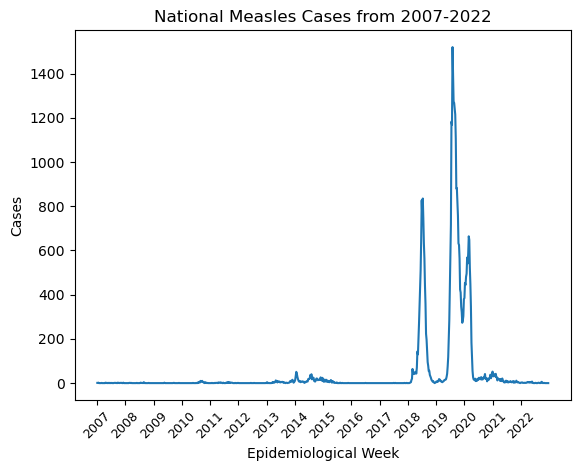

In [53]:
# Plotting 
x = range(len(df_nat['DATA_EPI']))
plt.plot(x, df_nat['CASES'],'-')

# Adjusting ticks
x_ticks = years + '-' + '01'
index_x_ticks = [year_week_epi.index(x) for x in x_ticks]
plt.xticks(index_x_ticks, years, rotation = 45,fontsize = 9)
plt.title('National Measles Cases from 2007-2022')
plt.xlabel('Epidemiological Week')
plt.ylabel('Cases')
plt.show()

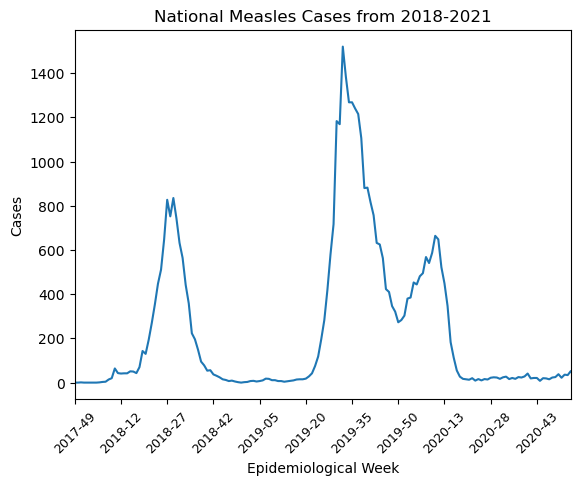

In [71]:
# Plotting 
x = range(len(df_nat['DATA_EPI']))
plt.plot(x, df_nat['CASES'],'-')

# Adjusting ticks
x_ticks = np.arange(0,len(x),15)
plt.xticks(x_ticks, df_nat['DATA_EPI'][x_ticks], rotation = 45,fontsize = 9)
plt.title('National Measles Cases from 2018-2021')
plt.xlim((570,731))
plt.xlabel('Epidemiological Week')
plt.ylabel('Cases')
plt.show()

### Cases with residence in other countries

In [72]:
res_path = '../Data/analyzed/res_epi_curve.csv'
df_res = pd.read_csv(res_path)

In [73]:
df_res['CASES_RES'] = df_res['CASO']
df_res = df_res.drop(columns = ['CASO','Unnamed: 0'])

In [76]:
df_nat = df_nat.merge(df_res, how = 'left', on = 'DATA_EPI')

In [78]:
df_nat = df_nat.fillna(0)

In [79]:
df_nat

,DATA_EPI,CASES,CASES_RES
0,2007-01,1.0,0.0
1,2007-02,1.0,0.0
2,2007-03,2.0,0.0
3,2007-04,0.0,0.0
4,2007-05,0.0,0.0
...,...,...,...
830,2022-48,0.0,0.0
831,2022-49,0.0,0.0
832,2022-50,0.0,0.0
833,2022-51,0.0,0.0


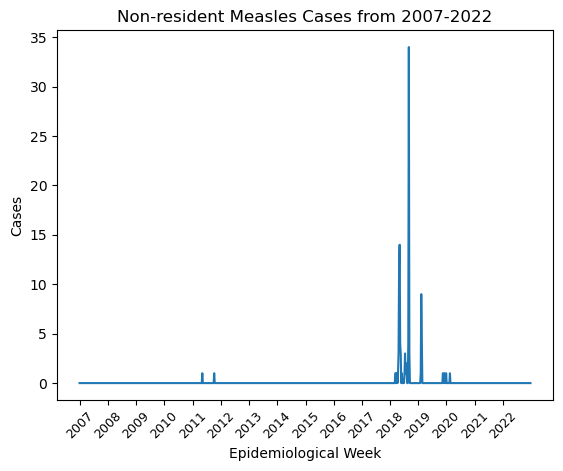

In [80]:
# Plotting 
x = range(len(df_nat['DATA_EPI']))
plt.plot(x, df_nat['CASES_RES'],'-')

# Adjusting ticks
x_ticks = years + '-' + '01'
index_x_ticks = [year_week_epi.index(x) for x in x_ticks]
plt.xticks(index_x_ticks, years, rotation = 45,fontsize = 9)
plt.title('Non-resident Measles Cases from 2007-2022')
plt.xlabel('Epidemiological Week')
plt.ylabel('Cases')
plt.show()

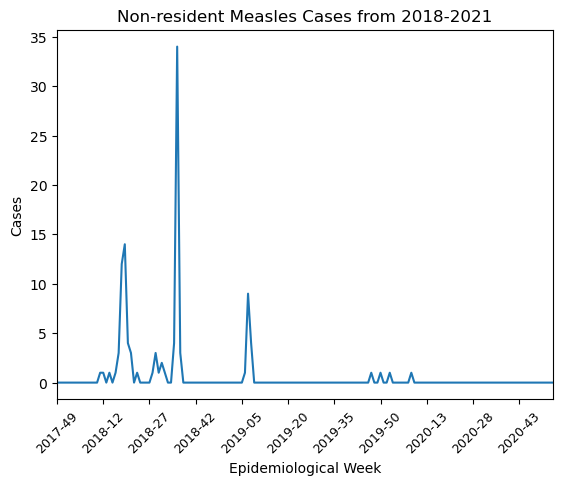

In [81]:
# Plotting 
x = range(len(df_nat['DATA_EPI']))
plt.plot(x, df_nat['CASES_RES'],'-')

# Adjusting ticks
x_ticks = np.arange(0,len(x),15)
plt.xticks(x_ticks, df_nat['DATA_EPI'][x_ticks], rotation = 45,fontsize = 9)
plt.title('Non-resident Measles Cases from 2018-2021')
plt.xlim((570,731))
plt.xlabel('Epidemiological Week')
plt.ylabel('Cases')
plt.show()

### Cases with infection in other countries

In [82]:
inf_path = '../Data/analyzed/inf_epi_curve.csv'
df_inf = pd.read_csv(inf_path)

In [83]:
df_inf['CASES_INF'] = df_inf['CASO']
df_inf = df_inf.drop(columns = ['CASO','Unnamed: 0'])

In [84]:
df_nat = df_nat.merge(df_inf, how = 'left', on = 'DATA_EPI')

In [85]:
df_nat = df_nat.fillna(0)

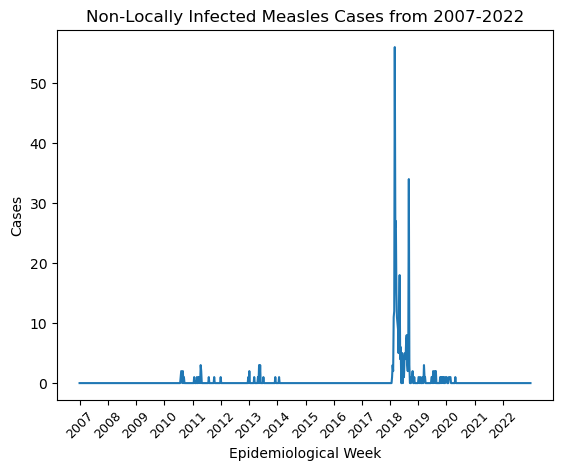

In [87]:
# Plotting 
x = range(len(df_nat['DATA_EPI']))
plt.plot(x, df_nat['CASES_INF'],'-')

# Adjusting ticks
x_ticks = years + '-' + '01'
index_x_ticks = [year_week_epi.index(x) for x in x_ticks]
plt.xticks(index_x_ticks, years, rotation = 45,fontsize = 9)
plt.title('Non-Locally Infected Measles Cases from 2007-2022')
plt.xlabel('Epidemiological Week')
plt.ylabel('Cases')
plt.show()

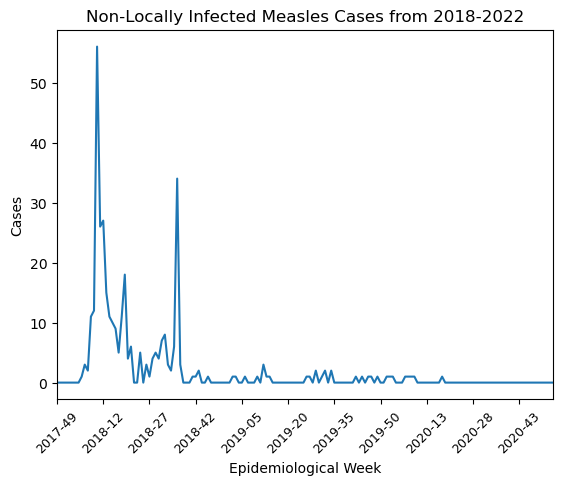

In [89]:
# Plotting 
x = range(len(df_nat['DATA_EPI']))
plt.plot(x, df_nat['CASES_INF'],'-')

# Adjusting ticks
x_ticks = np.arange(0,len(x),15)
plt.xticks(x_ticks, df_nat['DATA_EPI'][x_ticks], rotation = 45,fontsize = 9)
plt.title('Non-Locally Infected Measles Cases from 2018-2022')
plt.xlim((570,731))
plt.xlabel('Epidemiological Week')
plt.ylabel('Cases')
plt.show()

## Plotting all three epidemiological curves together

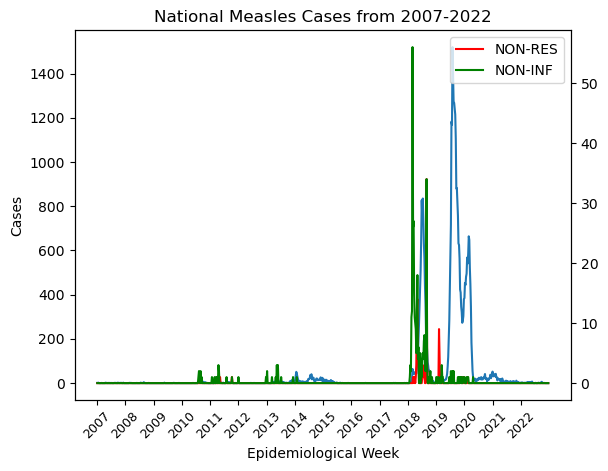

In [101]:
# Plotting 
x = range(len(df_nat['DATA_EPI']))

fig, ax = plt.subplots()
ax.plot(x, df_nat['CASES'],'-', label = 'TOTAL')

# Adjusting ticks
x_ticks = years + '-' + '01'
index_x_ticks = [year_week_epi.index(x) for x in x_ticks]
plt.xticks(index_x_ticks, years, rotation = 45,fontsize = 9)
plt.title('National Measles Cases from 2007-2022')
plt.xlabel('Epidemiological Week')
plt.ylabel('Cases')

ax2 = ax.twinx()
ax2.plot(x, df_nat['CASES_RES'], color = 'r',label = 'NON-RES')
ax2.plot(x, df_nat['CASES_INF'], color = 'g', label = 'NON-INF')
plt.legend()

plt.show()

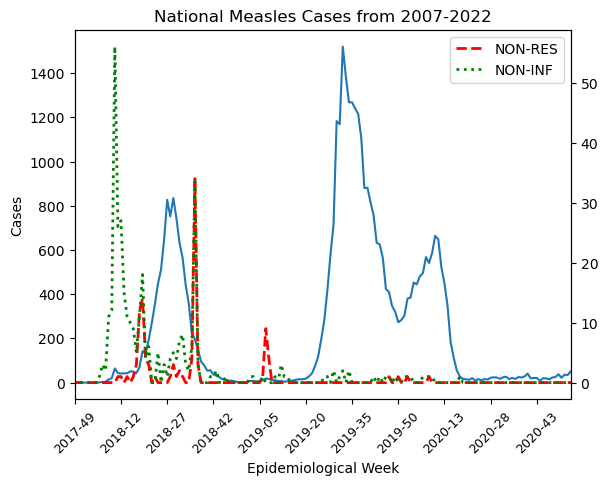

In [113]:
# Plotting 
x = range(len(df_nat['DATA_EPI']))
fig, ax = plt.subplots()
ax.plot(x, df_nat['CASES'],'-', label = 'TOTAL')

# Adjusting ticks
x_ticks = np.arange(0,len(x),15)
plt.xticks(x_ticks, df_nat['DATA_EPI'][x_ticks], rotation = 45,fontsize = 9)
plt.title('National Measles Cases from 2007-2022')
plt.xlim((570,731))
plt.xlabel('Epidemiological Week')
plt.ylabel('Cases')

ax2 = ax.twinx()
ax2.plot(x, df_nat['CASES_RES'], '--', color = 'r',label = 'NON-RES', linewidth = 2)
ax2.plot(x, df_nat['CASES_INF'], ':', color = 'g', label = 'NON-INF', linewidth = 2)
plt.legend()

plt.show()

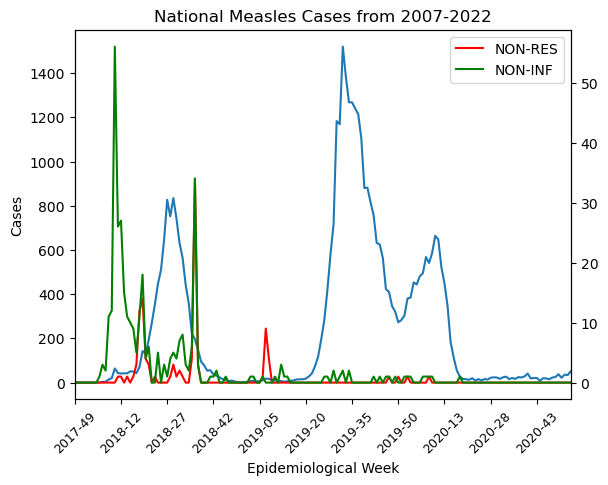

In [110]:
# Plotting 
x = range(len(df_nat['DATA_EPI']))
fig, ax = plt.subplots()
ax.plot(x, df_nat['CASES'],'-', label = 'TOTAL')

# Adjusting ticks
x_ticks = np.arange(0,len(x),15)
plt.xticks(x_ticks, df_nat['DATA_EPI'][x_ticks], rotation = 45,fontsize = 9)
plt.title('National Measles Cases from 2007-2022')
plt.xlim((570,731))
plt.xlabel('Epidemiological Week')
plt.ylabel('Cases')

ax2 = ax.twinx()
ax2.plot(x, df_nat['CASES_RES'], color = 'r',label = 'NON-RES')
ax2.plot(x, df_nat['CASES_INF'], color = 'g', label = 'NON-INF')
plt.legend()

plt.show()